## Thoughts
### Simplify the network
- Number of people on the airplane
- If a node has two egdes to the same node, we can merge them into one
- Cut off dead ends (Airports with no return)
- Merge airports that go from the same City. Example: JFK and NLI Airport
- Should airports have a certain amount of flights between airports before they are relevant?
- How many people does the average plane seat? Should we assume that planes with a shorter flight have fewer passengers and planes with a longer flight have more passengers.
- How often does a plane fly?

### How should the disease spread
- The number of airplanes leaving the airport should be equal to number of iterations for the specific airport.
- Probability for an infected person to travel with an airplane
- How much does the disease spread? For example, about 1/10 people in contact with the infected person gets the disease.




## Brief network description

We are working with an openflights airport network from icon.colorado.edu. which is a weighted, directed, multigraph, network where the nodes represent airports worldwide and the direction of edge {i,j} indicates a regularly occurring commercial flight, by a particular airline from airport i to airport j. Multiple edges may exist between pairs of airports if multiple airlines offer that flight, or if one airline offers multiple such flights each day. The  number of nodes is: 3214 and the  number of edges is: 18859.
https://networks.skewed.de/net/openflights


In [1]:
!pip install networkx

In [63]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [25]:
nodes = '../network/nodes.csv'
edges = "../network/edges.csv"

pd_nodes = pd.read_csv(nodes, sep=",")
pd_edges = pd.read_csv(edges, sep=",")
pd_edges.columns 

Index(['# source', ' target', ' distance', ' airline', ' airline_code',
       ' codeshare', ' equipment', ' stops'],
      dtype='object')

In [4]:
G =nx.from_pandas_edgelist(pd_edges,source='# source', target=' target', create_using = nx.MultiDiGraph)
print(nx.info(G))

MultiDiGraph with 3214 nodes and 66771 edges


## Basic Network statistics 
- Is it one fully connected component?
- Isolated nodes
- Is there any cycles?
- Is there any self loops? 
- Degree distribution plot and the cumulative distribution plot
- Does it follow the power law
- Calculate the density
- Global clustestering coefficient and average clustering coefficient
- Diameter and average diameter
- Path length distribution 
- Closeness and betweenness 
- Reach centrality 

In [5]:
#connected components
# - Strong connectivity = When there is a path from every node to every other node --> taking into account directions (subgraph)
# - Weak connectivity = When there is a path from every node to every other node not taking into account the directions
print(nx.number_strongly_connected_components(G))
print(nx.number_weakly_connected_components(G))
#for i in nx.weakly_connected_components(G):
#    print(i)
#for i in nx.strongly_connected_components(G):
#    print(i)

48
7


In [6]:
## Find isolated nodes:
for i in nx.isolates(G):
    print(i)
# There are not isolated nodes

In [7]:
# Find Cycles
cycles = len(list(nx.simple_cycles(G)))

KeyboardInterrupt: 

In [17]:
#Find self loops
nx.number_of_selfloops(G)
for i in nx.selfloop_edges(G):
    print("There is one self loop which can be found at node:", i)

There is one self loop which can be found at node: (1931, 1931)


In [68]:
#the source and target reference the index of the pd_nodes df
pd_edges[pd_edges["# source"]==1931 & pd_edges[" target"]==1931]
#pd_nodes[pd_nodes["# index"]==1931]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

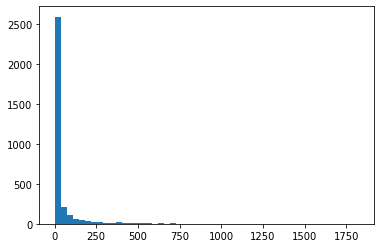

1 31
2 566
3 42
4 503
5 44
6 303
7 32
8 201
9 24
10 140
11 24
12 113
13 16
14 86
15 13
16 66
17 8
18 48
19 11
20 46
21 10
22 40
23 5
24 29
25 6
26 32
27 11
28 26
29 7
30 27
31 6
32 23
33 7
34 19
35 6
36 23
37 3
38 10
39 4
40 17
41 6
42 16
43 4
44 8
45 3
46 11
47 2
48 12
49 2
50 4
51 4
52 8
54 6
55 4
56 10
57 4
58 12
60 6
61 3
62 7
63 4
64 5
65 1
66 13
67 2
68 4
69 8
70 6
71 4
72 6
74 4
75 3
76 6
77 3
78 4
79 3
80 3
81 4
82 2
83 5
84 5
85 3
86 6
87 1
88 3
89 2
90 7
91 3
92 3
93 2
94 4
95 4
97 3
98 3
99 2
100 3
101 2
102 2
103 3
104 4
105 1
106 5
107 1
108 2
110 2
111 2
112 2
114 4
116 4
117 3
118 2
119 1
120 3
121 2
122 1
124 1
125 2
126 1
127 1
128 6
129 3
131 3
132 1
133 2
134 4
135 2
136 1
138 2
139 1
140 1
143 1
145 2
148 2
149 3
150 1
152 2
154 1
158 4
159 1
160 4
161 2
162 4
163 1
164 1
165 2
167 2
168 5
169 4
170 2
172 1
174 3
175 1
176 1
179 1
182 1
183 1
185 2
188 1
189 1
190 1
191 1
192 2
194 1
195 1
196 1
197 1
198 1
199 1
200 1
201 1
202 4
203 1
204 2
211 1
212 2
213 1
214 2

In [67]:
# Degree distribution plot
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, 50)
    plt.show()

plot_degree_dist(G)
## THHE CCDF IS NOT DONE
# The cumulative distribution plot (The y-axis in a CCDF is the probability of finding a node of degree k or high)
def cum_dist(G):
    degrees = [G.degree(n) for n in G.nodes()] #Is this the in or out degree? SHOULD BE LOOKED AT 
    num_of_nodes = len(degrees)
    count_degress = Counter(degrees)
    cum = []
    for degree, times in sorted(count_degress.items()):
        print(degree, times)
        cum.append(times/num_of_nodes)
   # plt.plot(degrees, 50)
    #plt.show()

cum_dist(G)

In [ ]:
#plane types explored 
from collections import Counter
equipment=[]
for i in pd_edges[" equipment"]:
    possible=str(i).split()
    for j in possible:
        equipment.append(j)
unique_equipment_count=Counter(equipment)
unique_equipment=pd.DataFrame(set(equipment))
print("Amount of each plane type",unique_equipment_count)
print("Unique plane types",set(equipment))
#print(Counter(pd_edges[" equipment"])) nope



Amount of each plane type Counter({'320': 15400, '738': 10344, '319': 7847, '321': 3662, '73H': 3343, '737': 2753, '73W': 2492, 'CRJ': 2224, 'E90': 1968, 'AT7': 1595, '333': 1585, '73G': 1584, '332': 1439, 'DH4': 1387, '733': 1283, '763': 1183, 'CR7': 1161, '757': 1069, 'CR9': 1011, 'ER4': 989, 'ERJ': 947, '777': 945, '77W': 908, '330': 903, '739': 868, 'E70': 864, 'DH8': 785, 'M88': 725, '735': 705, 'E75': 701, 'M80': 656, '772': 633, 'ATR': 626, '73C': 623, '717': 614, '752': 604, '744': 599, '100': 590, '343': 490, 'DH3': 484, 'SF3': 475, '767': 461, '734': 460, 'CR2': 458, 'E95': 457, 'M90': 416, 'ERD': 415, '32S': 383, '773': 370, '736': 364, 'M83': 361, 'DHT': 354, '32A': 315, '75W': 311, 'DH1': 305, 'BEH': 290, '788': 287, 'AT4': 269, 'CNA': 266, 'CNC': 258, 'AT5': 256, '318': 253, 'BE1': 237, '310': 225, '346': 222, '388': 214, 'EM2': 214, '76W': 196, 'EMJ': 195, 'DH2': 187, 'F70': 175, 'AR1': 162, 'M82': 160, 'CRK': 159, '764': 153, '77L': 151, '73J': 145, '753': 143, 'F50': 1

In [ ]:

unique_equipment.to_csv("./network/planes.csv", sep='\t',index=False)

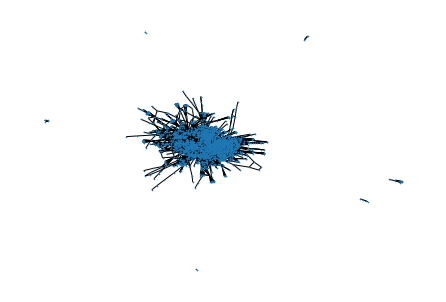

In [ ]:
nx.draw(G,node_size=0.4)
plt.show()

In [ ]:
!pip install python-igraph

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30c69275-ad4c-4319-be77-065d0edffda8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>